#  Regresión logística Binomial

Para este caso, vamos a usar la base de datos Telco Customer Churn con el cual buscaremos predecir si un cliente va a abandonar la compañía

## Importamos librerías

In [1]:
import pandas as pd
import numpy as np

## Importamos nuestra base de datos

In [5]:
df=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

## Inspección y limpieza de datos

Hagamos una revisión rápida de nuestros tipos de datos con el método .info()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Cambiar el tipo de dato de TotalCharges a numeric

Vemos que la columna TotalCharges que debería ser numérica la tenemos como tipo object, así que debemos cambiarla, esto lo podemos hacer con pd.to_numeric()

In [ ]:
df.TotalCharges=pd.to_numeric(df.TotalCharges, errors='coerce')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


### Manejo de datos nulos

Ya hemos arreglado el tipo de dato de nuestras columnas, ahora veamos nuestros datos nulos:

In [ ]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Vemos que ahora tenemos 11 datos nulos en la columna que acabamos de transformar esto podría ser un error por parte de la transformación de tipo de dato, revisemos cuales registros tienen valores nulos

In [ ]:
df[df['TotalCharges'].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Revisamos algún registro en la base de datos antes de transformar TotalCharges

In [ ]:
df.loc[488]

customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                              NaN
Churn                                      No
Name: 488, dtype: object

Vemos que originalmente la base da datos tiene estos datos nulos y que además son pocos en comparación al total de nuestros datos, así que podemos pasar a eliminar los registros con estos valores nulos

In [ ]:
df.dropna(inplace=True) # Inplace hace que los datos se hagan en la base de datos original

In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Eliminar columnas innecesarias

Para nuestro modelo de regresión logística, un parámetro innecesario es el customerID así que procedemos a eliminarlo

In [ ]:
df.drop('customerID',axis=1,inplace=True)

# Análisis exploratorio de datos

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

## Proporciones en variables categóricas

Lo primero que veremos serán las proporciones respecto a nuestras variables categóricas para buscar alguna relación con nuestra variable objetivo (Churn)

Creamos la función para crear las gráficas

In [ ]:
def plot_categorial(column):
    fig = plt.figure()
    sns.countplot(data=df, x=column,hue='Churn')
    plt.show()

Tomamos los nombres de las variables categóricas

In [ ]:
column_cat = df.select_dtypes(include='object').columns

Creamos las gráficas con un ciclo for

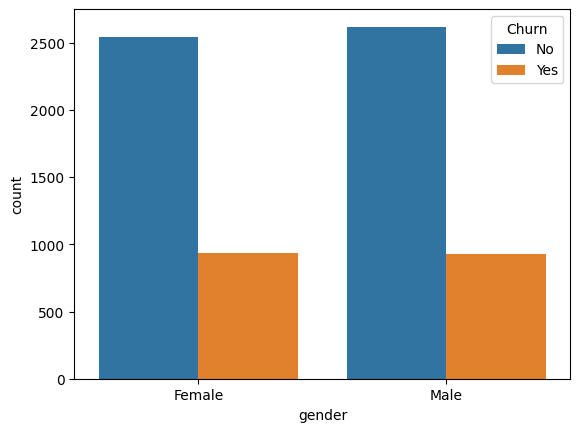

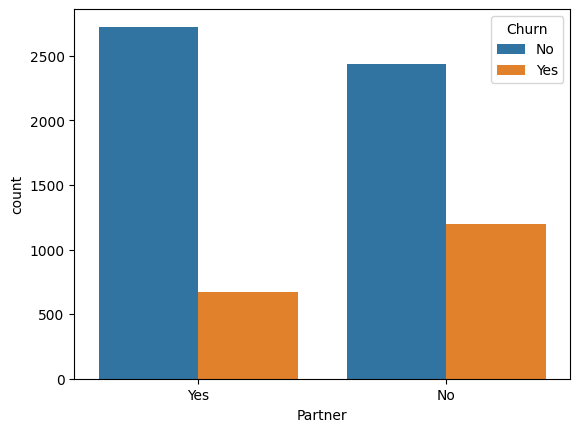

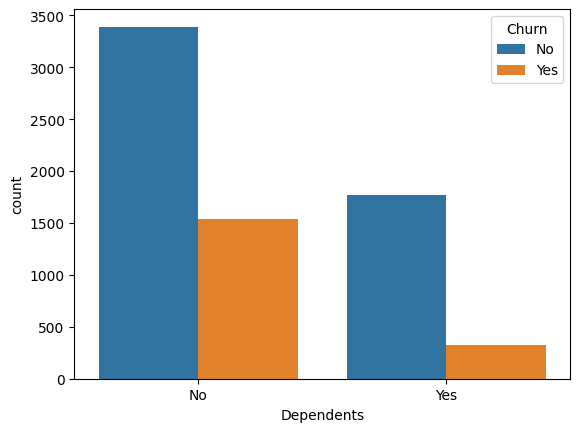

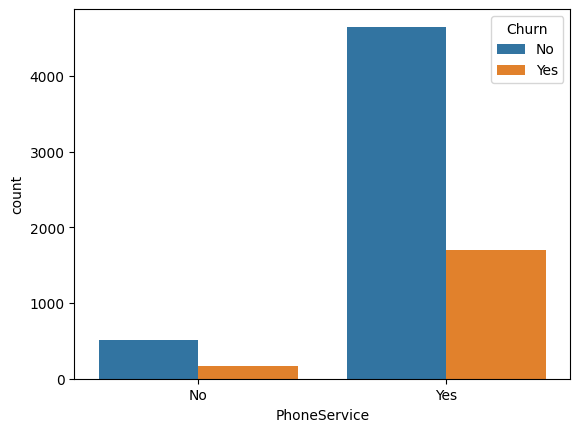

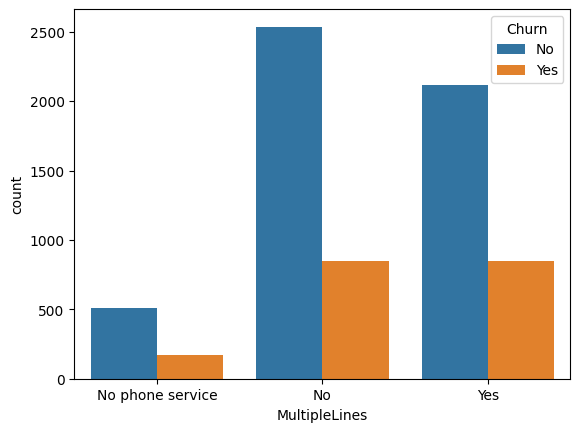

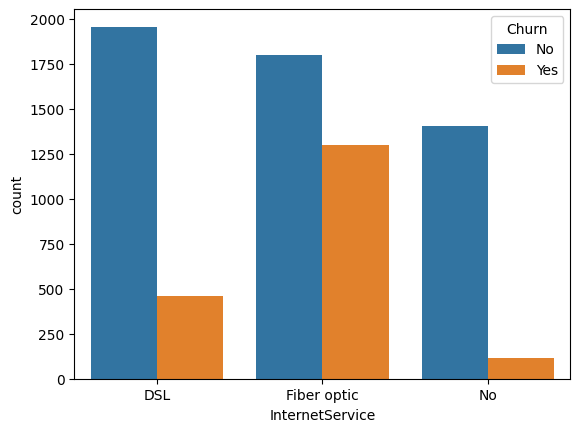

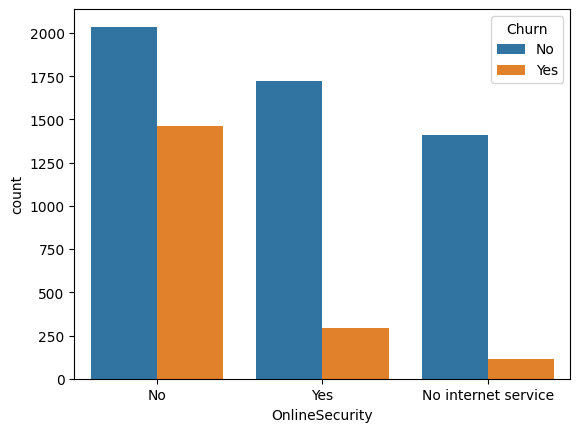

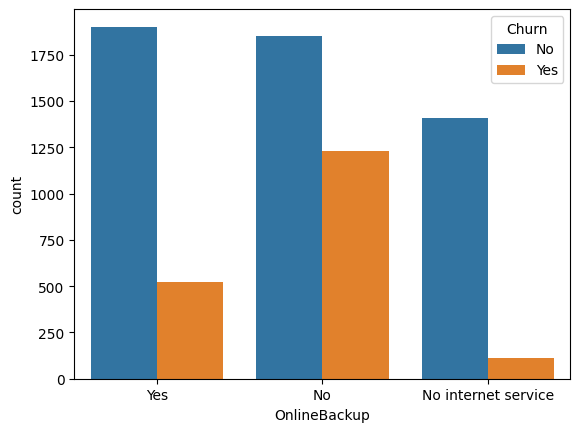

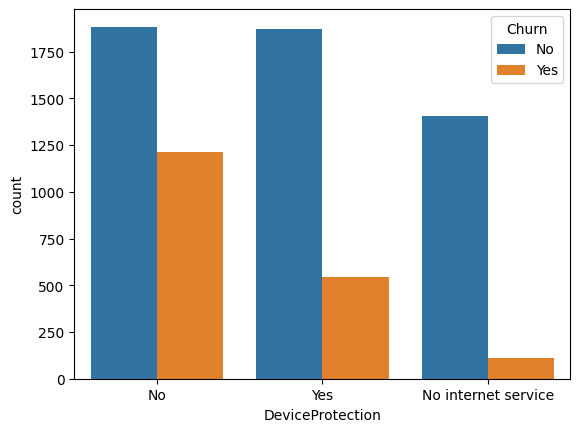

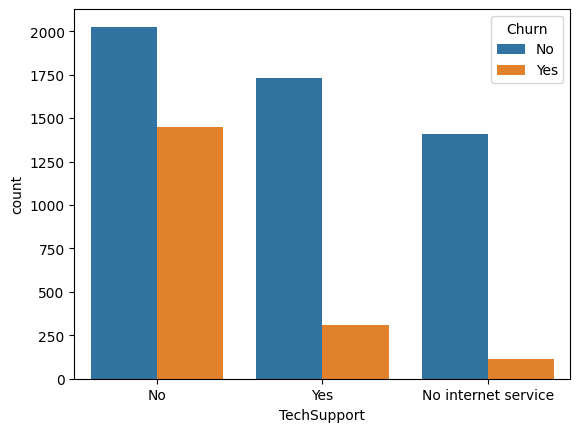

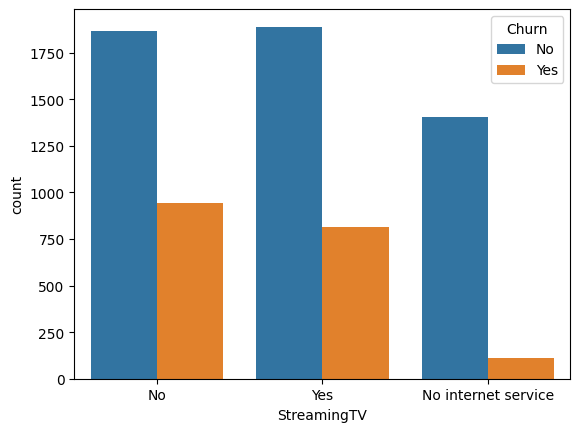

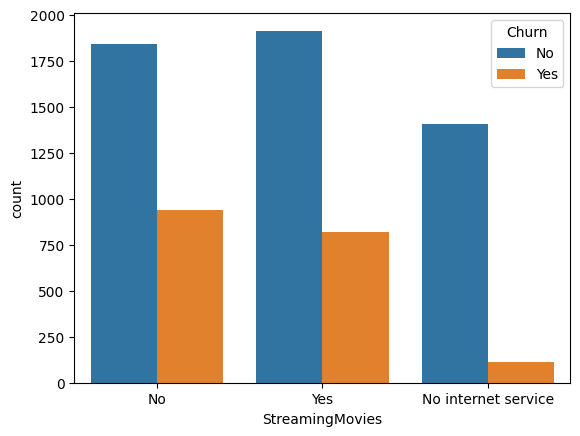

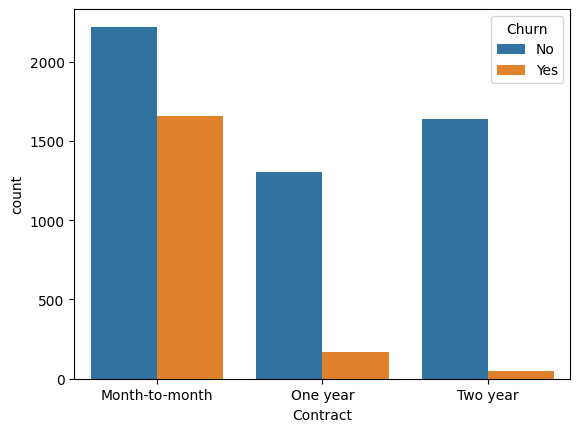

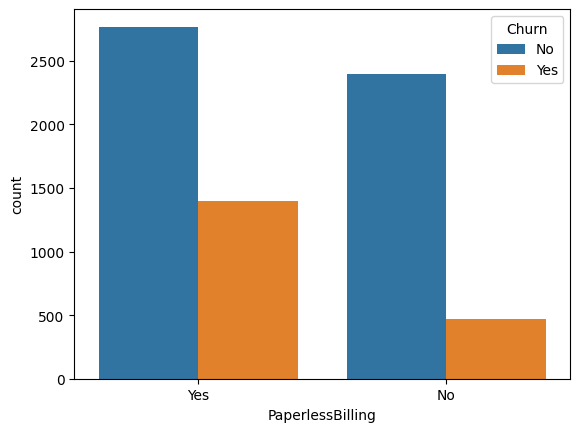

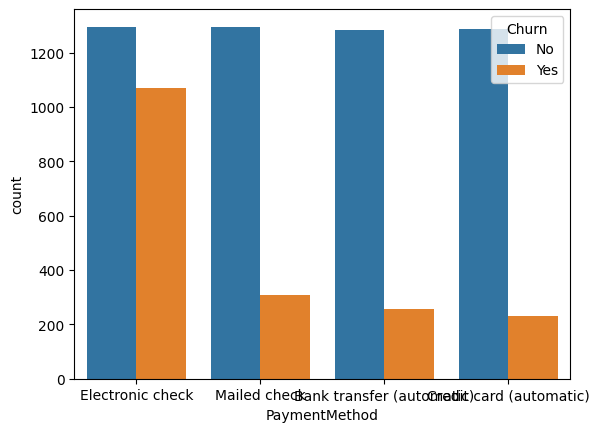

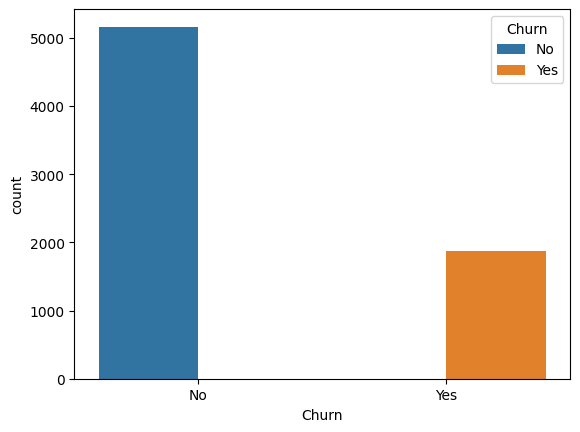

In [ ]:
for _ in column_cat:
    plot_categorial(_)

También podemos ver la variable SeniorCitizen que al uso también es una variable categórica

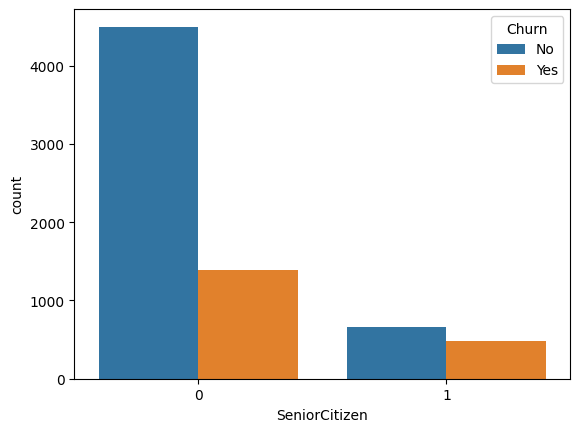

In [ ]:
fig = plt.figure()
sns.countplot(data=df, x='SeniorCitizen',hue='Churn')
plt.show()

## Distribuciones en variables numéricas

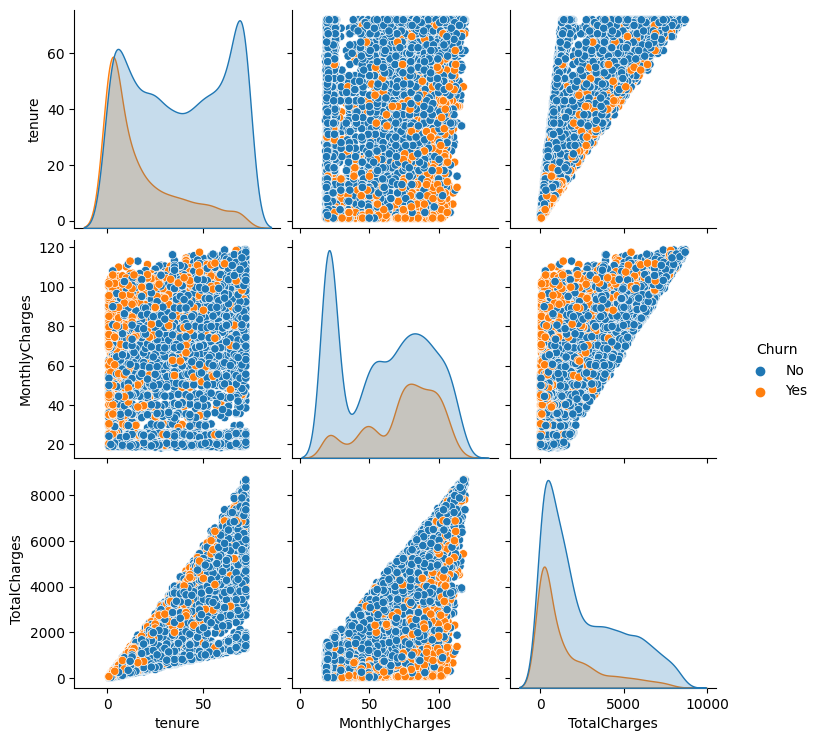

In [ ]:
sns.pairplot(df[['tenure','MonthlyCharges','TotalCharges','Churn']],hue='Churn');

# Manejo de variables categóricas

Lo primero que haremos será un mapeo de nuestra variable Churn ya que los valores que necesitamos son numéricos

In [ ]:
df.Churn=df.Churn.apply(lambda x: 1 if x=='Yes' else 0)

In [ ]:
df.Churn.sample(5)

3286    1
3362    1
3367    0
3157    1
5216    1
Name: Churn, dtype: int64

Ahora, para el resto de variables categóricas podemos hacer un mapeo con pd.get_dummies()

In [ ]:
df=pd.get_dummies(df)
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


# Análisis de correlación

Ya que tenemos demasiados parámetros debido al mapeo de nuestras variables categóricas, podemos hacer el análisis de correlación solo con nuestra variable objetivo.

In [ ]:
import matplotlib.pyplot as plt

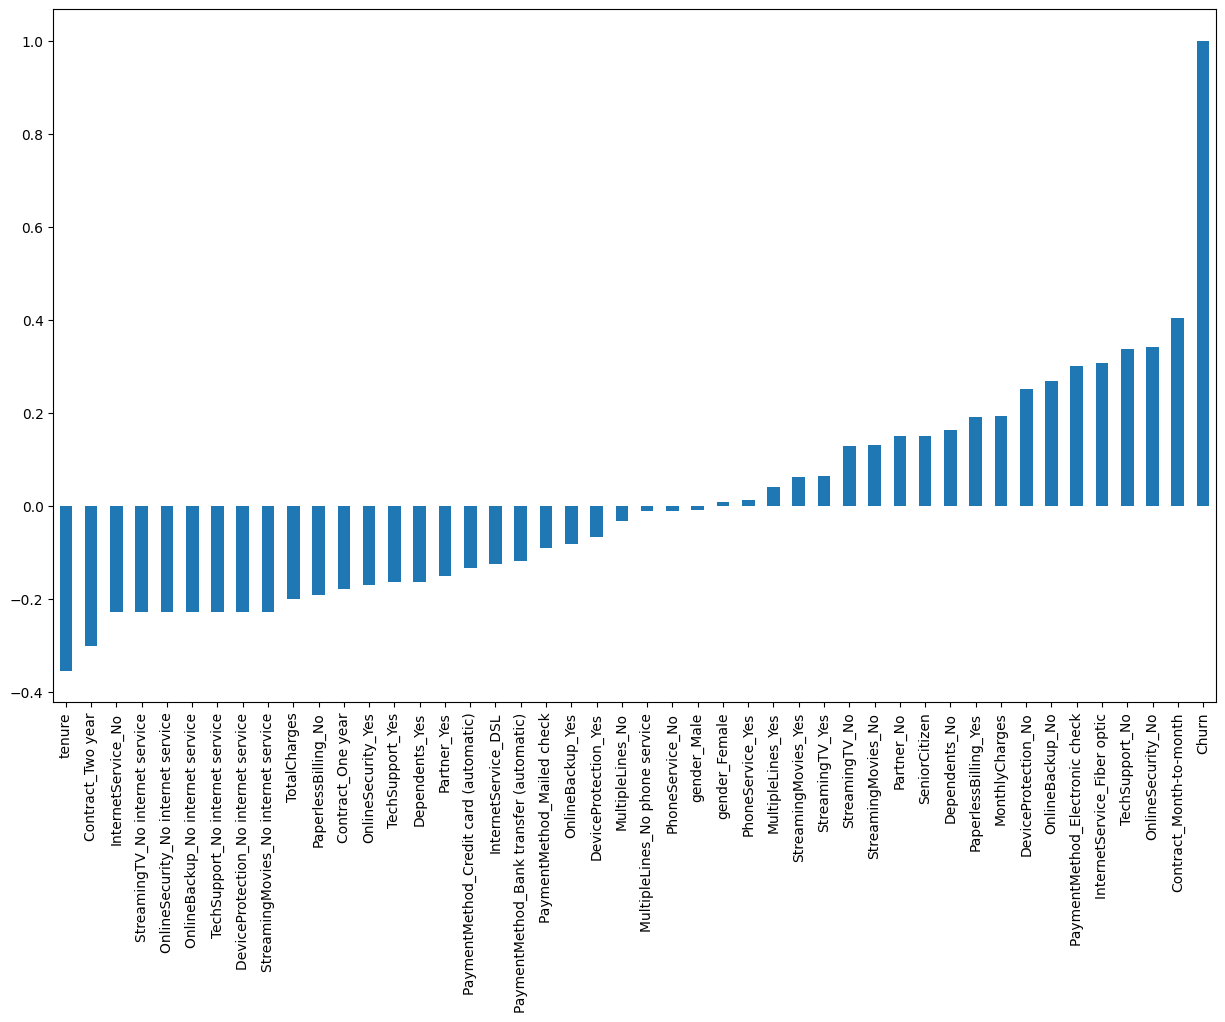

In [ ]:
fig = plt.figure(figsize=(15,9))
df.corr()['Churn'].sort_values(ascending=True).plot(kind='bar')
plt.show();

# Escalamiento de los datos

Ahora haremos un escalamiento min-max de nuestros datos para mejorar el performance de nuestro modelo.

Para esto usaremos el modelo de escalamiento de scikit-learn MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler()
df_scaled=scaler.fit_transform(df)

# NOTA IMPORTANTE:
Como metodologia general NUNCA ES CONVENIENTE ESCALAR LAS ETIQUETAS.

Escalar las etiquetas podría introducir distorsiones en las categorías o clases y afectar negativamente el rendimiento del modelo. Por ejemplo, en un problema de clasificación binaria donde las etiquetas son 0 y 1, si se escalaran las etiquetas, podrían dejar de representar de manera adecuada las clases originales y podrían no ser interpretables correctamente.

Las etiquetas generalmente tienen un significado categórico y no están sujetas a las mismas consideraciones de escala que las características (variables independientes)



Ahora, nuestra base de datos escalada es un ndarray, así que tenemos que convertirla en un dataframe

In [ ]:
type(df_scaled)

numpy.ndarray

In [ ]:
# Convertimos a df_scaled en un dataframe y le asignamos el nombre de las columnas originales
df_scaled=pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.000000,0.115423,0.001275,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.464789,0.385075,0.215867,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.014085,0.354229,0.010310,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.619718,0.239303,0.210241,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.014085,0.521891,0.015330,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


# Creación y entrenamiento del modelo

## División de atributos y selección de training y test

Primero haremos la separación de nuestros predictores y nuestra variable objetivo

In [ ]:
X=df_scaled.drop('Churn',axis=1)

In [ ]:
y=df.Churn.values

y ahora dividimos training y test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Creación del modelo

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg=LogisticRegression(max_iter=10000)

## Entrenamiento del modelo

In [ ]:
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

# Evaluación del modelo

## Accuracy

In [ ]:
logreg.score(X_test,y_test)

0.795734597156398

## Matriz de confusión

In [ ]:
from sklearn.metrics import confusion_matrix

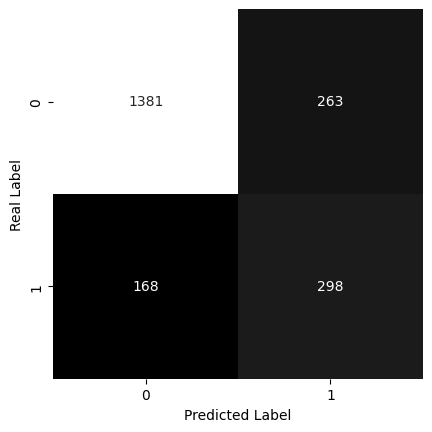

In [ ]:
cm=confusion_matrix(logreg.predict(X_test),y_test)
sns.heatmap(
    cm,
    annot=True,
    cmap='gray',
    cbar=False,
    square=True,
    fmt="d"
    )
plt.ylabel('Real Label')
plt.xlabel('Predicted Label');

Vemos que aunque nuestro accuracy podía hacernos creer que teníamos un buen modelo, al revisar nuestra matriz de confusión vemos que cuando Churn=1 el modelo tiene un acierto del 64% lo cual es bajo

## Predicción en términos de probabilidad

Una ventaja de los modelos de regresión logística es que nos entrega la probabilidad que le asigna el modelo a cada registro de que pertenezca a cada una de las clases con el método .predict_proba()

In [ ]:
logreg.predict_proba(X_test)

array([[0.99026975, 0.00973025],
       [0.86177928, 0.13822072],
       [0.30146826, 0.69853174],
       ...,
       [0.99036368, 0.00963632],
       [0.70107106, 0.29892894],
       [0.82854887, 0.17145113]])

## Coeficientes de los features en la función de decisión

Otro factor que podemos observar es la importancia que tiene cada uno de los features en la predicción de nuestra variable objetivo con el atributo .coef_

In [ ]:
logreg.coef_

array([[ 0.21796019, -3.11260514, -0.1637201 ,  1.20641853,  0.01148311,
        -0.01172264, -0.06126465,  0.06102512,  0.12782956, -0.12806909,
         0.0941806 , -0.09442013, -0.15367242,  0.0941806 ,  0.05925229,
        -0.41044026,  0.51836108, -0.10816035,  0.24669454, -0.10816035,
        -0.13877372,  0.09080299, -0.10816035,  0.01711783,  0.063271  ,
        -0.10816035,  0.04464982,  0.22751862, -0.10816035, -0.1195978 ,
        -0.07898663, -0.10816035,  0.18690744, -0.08020813, -0.10816035,
         0.18812895,  0.74999035, -0.0881227 , -0.66210719, -0.10368948,
         0.10344995,  0.00369764, -0.15329021,  0.22140626, -0.07205322]])

Una mejor forma de interpretar estos datos es con una gráfica de barras

> Mientras mayor sea el valor absoluto del coeficiente mayor es el efecto del feature en la predicción

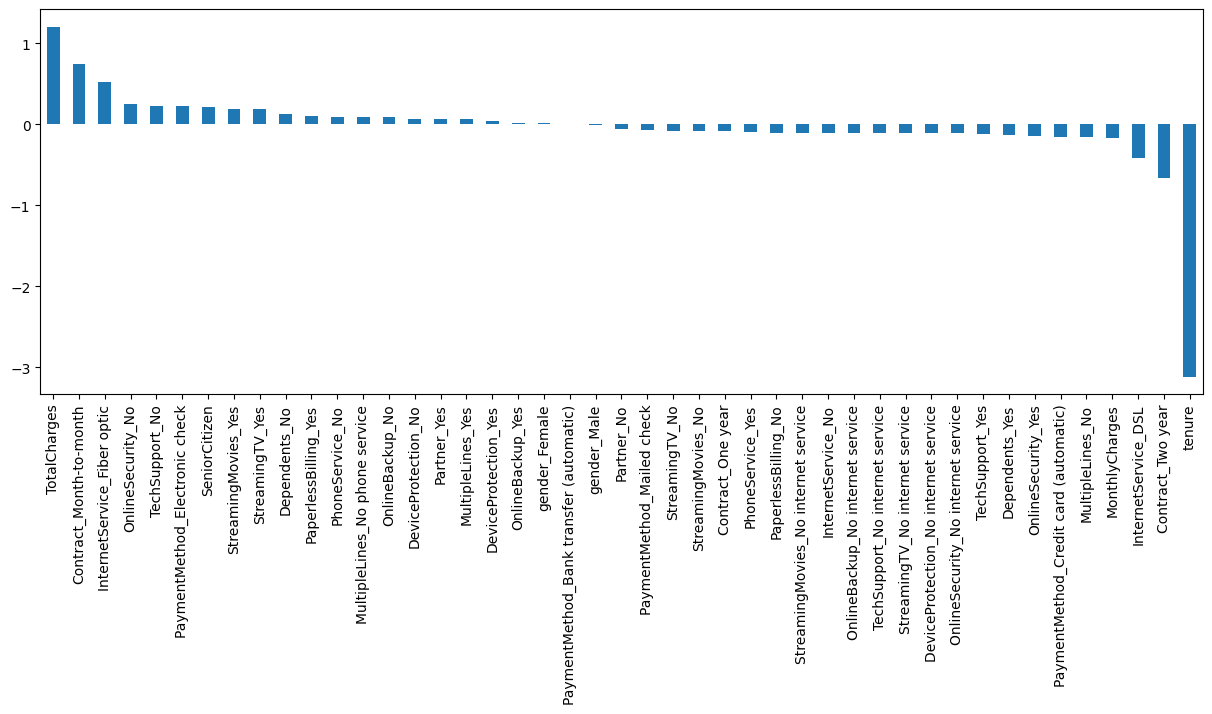

In [ ]:
weights = pd.Series(logreg.coef_[0], index=X.columns.values).sort_values(ascending=False)
fig = plt.figure(figsize=(15,5))
weights.plot(kind='bar');

# Regularización

Esta técnica consiste en disminuir la complejidad de nuestro modelo a través de una penalización aplicada a sus variables más irrelevantes.

Para este ejemplo compararemos los resultados obtenidos con los distintos métodos de regularización usando la misma semilla y el mismo solver (saga)

## Tipos de regularización

### L1 Lasso

Reduce la complejidad a través de eliminación de features que no aportan demasiado al modelo.
Penaliza a los features que aporta poca información volviéndolos cero, eliminado el ruido que producen en el modelo.

> C es un parámetro que define que tanto se penaliza a los features que menos aportan, debe ser siempre un valor positivo y mientras mas pequeño mayor sera la penalización

In [ ]:
lasso=LogisticRegression(max_iter=10000, penalty='l1',solver='saga',C=0.5)
lasso.fit(X_train, y_train)
lasso.score(X_test,y_test)

0.7962085308056872

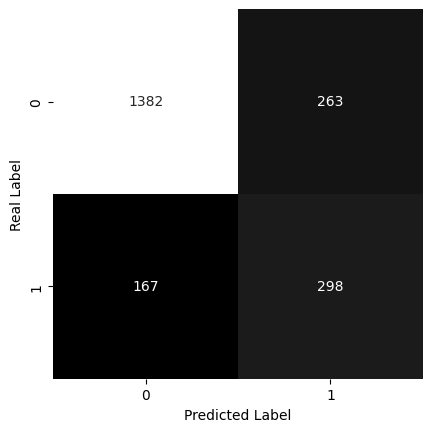

In [ ]:
cm=confusion_matrix(lasso.predict(X_test),y_test)
sns.heatmap(
    cm,
    annot=True,
    cmap='gray',
    cbar=False,
    square=True,
    fmt="d"
    )
plt.ylabel('Real Label')
plt.xlabel('Predicted Label');

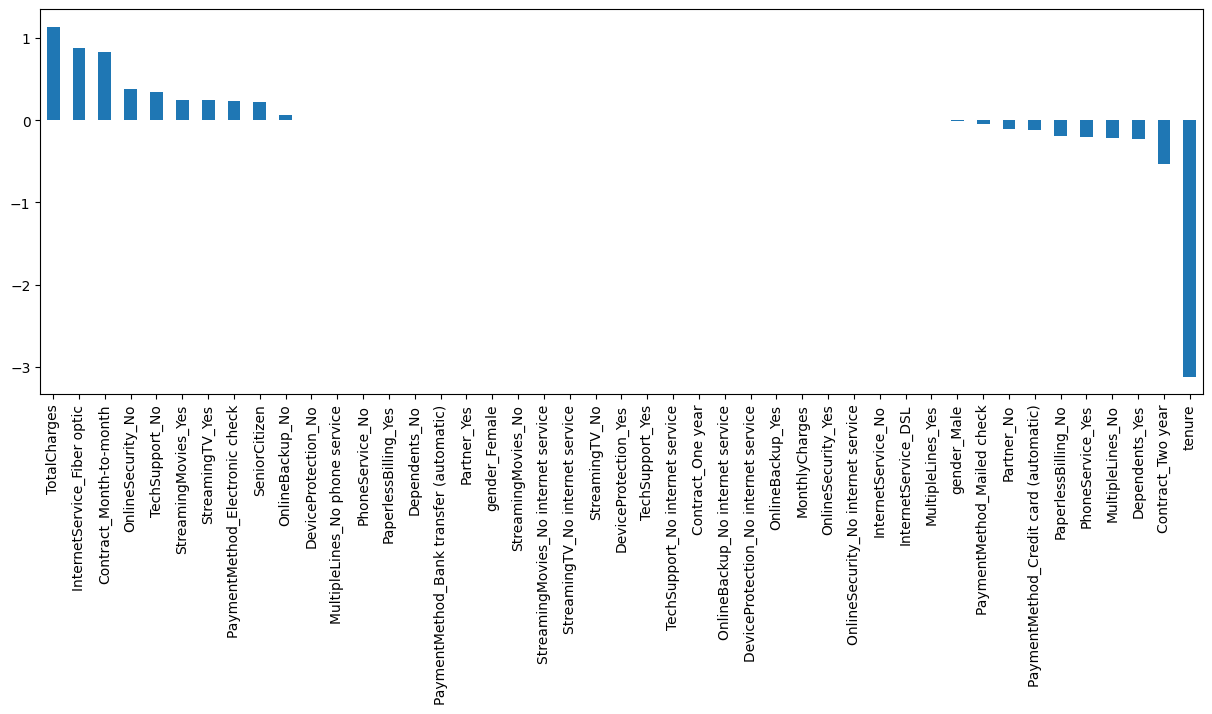

In [ ]:
weights = pd.Series(lasso.coef_[0], index=X.columns.values).sort_values(ascending=False)
fig = plt.figure(figsize=(15,5))
weights.plot(kind='bar');

Podemos ver cuales de nuestros parámetros se convirtieron a 0:

In [ ]:
weights[weights==0]

StreamingMovies_No                      0.0
StreamingMovies_No internet service     0.0
StreamingTV_No internet service         0.0
StreamingTV_No                          0.0
DeviceProtection_Yes                    0.0
TechSupport_Yes                         0.0
TechSupport_No internet service         0.0
Contract_One year                       0.0
OnlineBackup_No internet service        0.0
DeviceProtection_No internet service    0.0
OnlineBackup_Yes                        0.0
MonthlyCharges                          0.0
OnlineSecurity_Yes                      0.0
OnlineSecurity_No internet service      0.0
InternetService_No                      0.0
InternetService_DSL                     0.0
MultipleLines_Yes                       0.0
dtype: float64

### L2 Ridge

Reduce la complejidad disminuyendo el impacto de ciertos features a nuestro modelo.
Penaliza los features poco relevantes, pero no los vuelve cero. Solamente limita la información que aportan a nuestro modelo.

In [ ]:
ridge=LogisticRegression(max_iter=10000, penalty='l2',solver='saga',C=0.5)
ridge.fit(X_train, y_train)
ridge.score(X_test,y_test)

0.7966824644549763

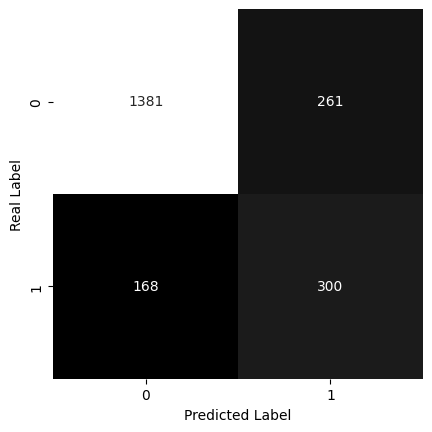

In [ ]:
cm=confusion_matrix(ridge.predict(X_test),y_test)
sns.heatmap(
    cm,
    annot=True,
    cmap='gray',
    cbar=False,
    square=True,
    fmt="d"
    )
plt.ylabel('Real Label')
plt.xlabel('Predicted Label');

In [ ]:
weights = pd.Series(ridge.coef_[0], index=X.columns.values).sort_values(ascending=False)
fig = plt.figure(figsize=(15,5))
weights.plot(kind='bar');

NameError: ignored

Ridge no convierte a los features que aportan poco en 0

### Lasso vs Ridge

1. No hay un campeón definitivo para todos los problemas.
2. Si hay pocos features que se relacionen directamente con la variable a predecir: Probar Lasso.
3. Si hay varios features relacionados con la variable a predecir: Probar Ridge.

Para aplicarlos y decidir cuál es el mejor en la práctica, podemos probar usando alguna técnica como cross-validation iterativamente. o bien, podemos combinarlos…

### ElasticNet: Una técnica intermedia:

Hasta el momento hemos podido ver dos técnicas de regularización en las cuales añadimos un componente de penalización en el proceso donde encontramos los valores de los parámetros 𝛽 minimizando la función de error.

Es común encontrarnos en la literatura con un camino intermedio llamado ElasticNet. Esta técnica consiste en combinar las dos penalizaciones anteriores en una sola función.

Cuando usamos ElasticNet:

1. Tenemos una forma de probar ambas L1 y L2 al tiempo sin perder información.
2. Supera las limitaciones individuales de ellas.
3. Si hace falta experiencia, o el conocimiento matemático de fondo, puede ser la opción preferente para probar la regularización.

> Para implementar ElasticNet ahora vamos a usar l1_ratio el cual puede tomar valores entre 0 a 1. Si l1_ratio = 0 , ElasticNet se comportará como Ridge, y si l1_ratio = 1 , se comportará como Lasso. Por lo tanto, nos brinda todo el espectro lineal de posibles combinaciones entre estos dos extremos.

En este caso simplemente vamos a comparar el accuracy que obtenemos con distintos valores de l1_ratio:

In [ ]:
val_c=np.arange(0,1,0.01)
acc=[]
for i in val_c:
    acc.append(LogisticRegression(max_iter=10000, penalty='elasticnet',solver='saga',l1_ratio=i).fit(X_train, y_train).score(X_test,y_test))

Ahora podemos crear una gráfica de  como se comportó nuestro accuracy on distintos valores de l1_ratio

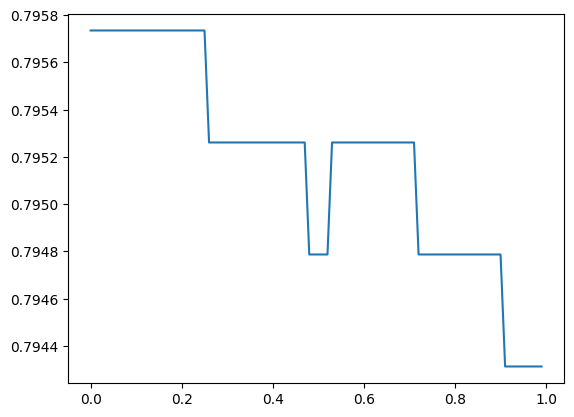

In [ ]:
plt.plot(val_c,acc);

Igualmente recordemos que se calculó el accuracy con una sola iteración y que para realmente comparar estos valores debemos usar mejores estrategias de validación como Cross-validation

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2a8c1f55-79ef-42c3-8fb6-b2930d81a137' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>